In [23]:
import numpy as np

name_file = open('catalog.txt')
name = name_file.readlines()
coor_file = open('coor.txt')
coor = coor_file.readlines()
coors = coor[0].split('s')
cata = open('cata.txt','w+')
for i in range(0,len(coors)-1):
    coors[i] = coors[i] + 's'
for j in range(0,len(name)):
    cata.write('{0}   {1}   {2}\n'.format(name[j].strip(),coors[2*j+0],coors[2*j+1]))
name_file.close()
coor_file.close()
cata.close()

In [25]:
import numpy as np

name_file = open('catalog.txt')
name = name_file.readlines()
coor_file = open('coor.txt')
coor = coor_file.readlines()
coors = coor[0].split(' ')
cata = open('cata.txt','w+')
for j in range(0,len(name)):
    cata.write('\"{0}\"   {1}{2}{3}{4}   {5}{6}{7}{8}\n'.format(name[j].strip(),coors[8*j+0],coors[8*j+1],coors[8*j+2],coors[8*j+3],coors[8*j+4],coors[8*j+5],coors[8*j+6],coors[8*j+7]))
name_file.close()
coor_file.close()
cata.close()

In [13]:
cat = open('catalog.txt')
name = cat.readlines()
print(len(name))
cat.close()

202


In [31]:
def Pix_speccc(gal_name):

    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.io import fits
    from astropy.table import Table

    num = len(gal_name)
    ii = num//4
    for i in range(0,ii):
        Wwave = np.array([])
        Sspec = np.array([])
        Sspec_u = np.array([])
        for j in [3, 2, 1, 0]:
            name = gal_name[4*i+j].strip()
            nnnn = name.split('+')[0]
            mm = int(name.split('+')[1])
            nn = int(name.split('+')[2])
            nnmm = '../goms/{}_sp.tbl'.format(nnnn)
            Sppp = Table.read(nnmm, format='ascii.ipac')
            Spec = Sppp['FLUX']
            Spec_u = Sppp['FLUX_UNCERTAINTY']
            wave = Sppp['WAVELENGTH']
            mode = nnnn.split('_')[-1]
            if(mode == 'SL2'):
                delt = 0.000513888895512
                sr = mm*nn*(delt*3600)**2
                Spec = Spec*sr
                Spec_u = Spec_u*sr
                mask = wave < 7.53
                Sspec = np.concatenate((Sspec, Spec))
                Sspec_u = np.concatenate((Sspec_u, Spec_u))
                Wwave = np.concatenate((Wwave, wave))
            if(mode == 'SL1'):
                delt = 0.000513888895512
                sr = mm*nn*(delt*3600)**2
                Spec = Spec*sr
                Spec_u = Spec_u*sr
                mask1 = wave > Wwave[-1]
                mask2 = wave < 14.4
                mask = mask1*mask2
                Sspec = np.concatenate((Sspec, Spec[mask]))
                Sspec_u = np.concatenate((Sspec_u, Spec_u[mask]))
                Wwave = np.concatenate((Wwave, wave[mask]))
            if(mode == 'LL2'):
                delt = 0.00141111109406
                sr = mm*nn*(delt*3600)**2
                Spec = Spec*sr
                Spec_u = Spec_u*sr
                mask1 = wave > Wwave[-1]
                mask2 = wave < 20.65
                mask = mask1*mask2
                Sspec = np.concatenate((Sspec, Spec[mask]))
                Sspec_u = np.concatenate((Sspec_u, Spec_u[mask]))
                Wwave = np.concatenate((Wwave, wave[mask]))
            if(mode == 'LL1'):
                delt = 0.00141111109406
                sr = mm*nn*(delt*3600)**2
                mask1 = wave > Wwave[-1]
                mask2 = wave < 37.0
                mask = mask1*mask2
                Spec = Spec*sr
                Spec_u = Spec_u*sr
                Sspec = np.concatenate((Sspec, Spec[mask]))
                Sspec_u = np.concatenate((Sspec_u, Spec_u[mask]))
                Wwave = np.concatenate((Wwave, wave[mask]))

        band = np.zeros(len(Wwave), dtype=int)
        Spectra = Table([Wwave, Sspec, Sspec_u, band], names = ('wavelength','flux','sigma','band'))
        Spectra['wavelength'].format = '.8f'
        Spectra['flux'].format = '.8f'
        Spectra['sigma'].format = '.9f'
#                    Spec['band'].format = '6d'
        Spectra.write('Spectra/{}_sp.tbl'.format(nnnn[:-4]),format='ascii.ipac',overwrite=True)
    return

In [32]:
cata = open('goals.txt')
gal_name = cata.readlines()
Pix_speccc(gal_name)

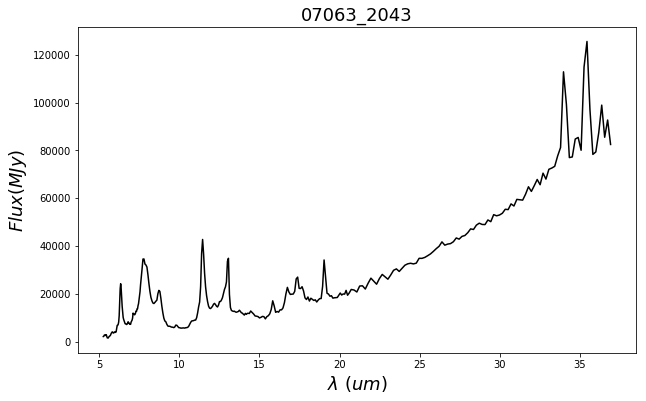

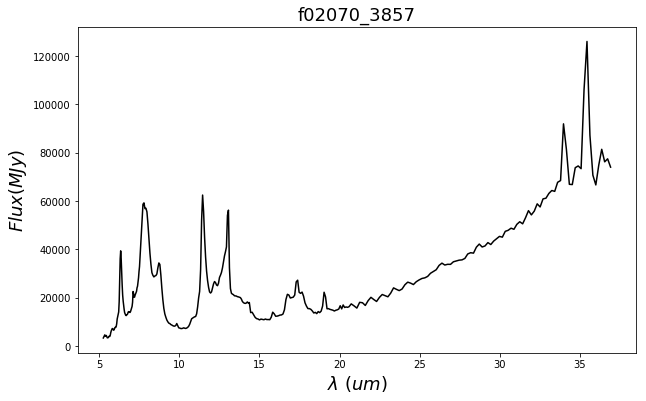

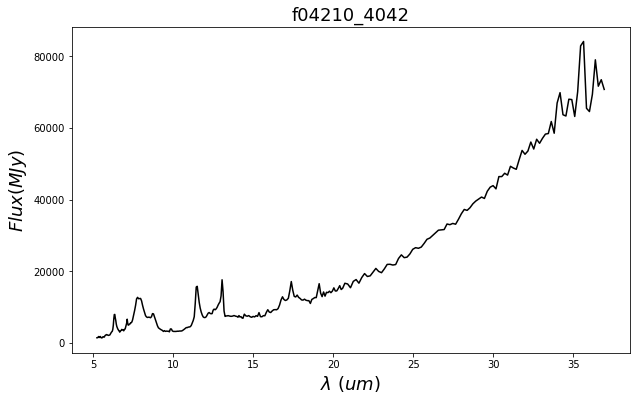

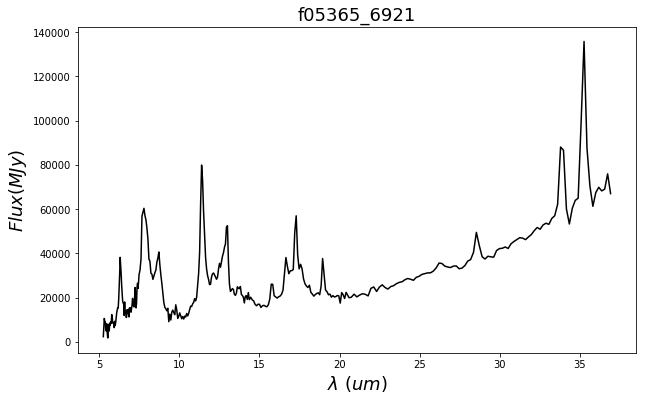

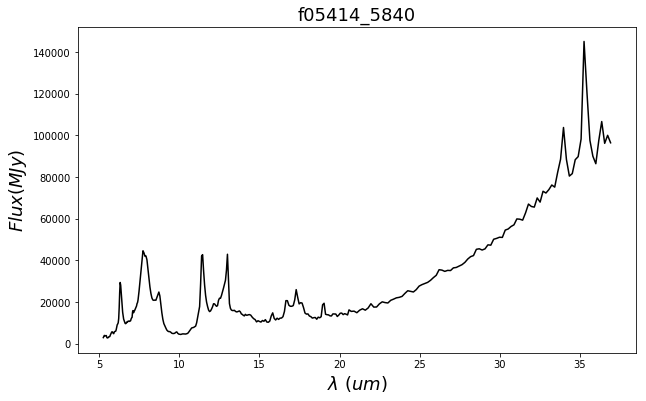

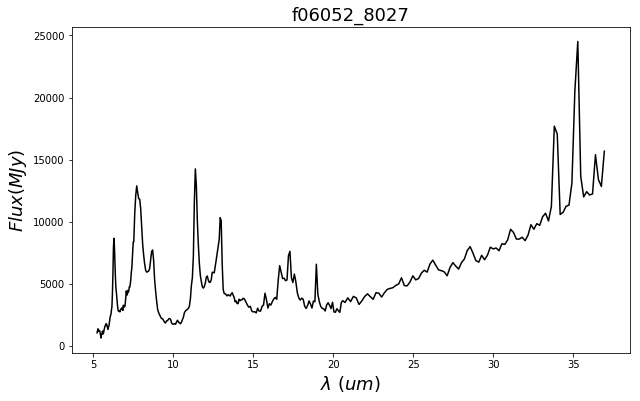

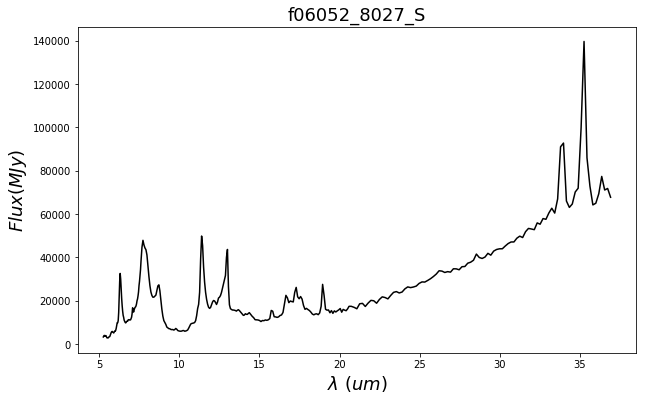

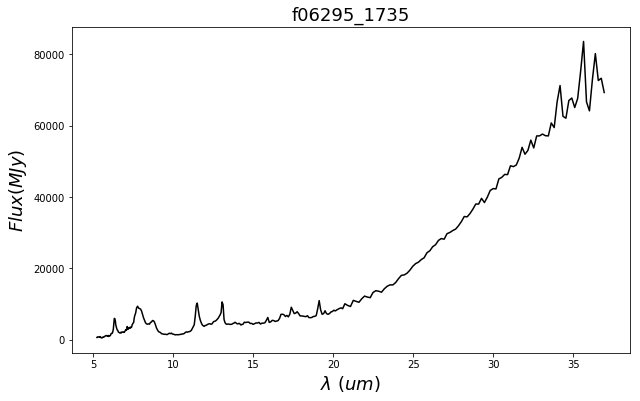

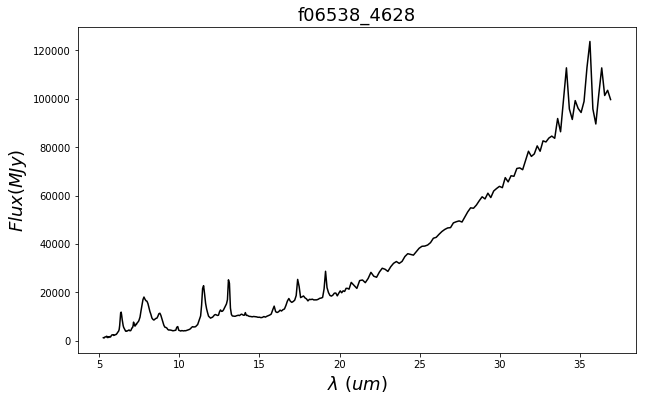

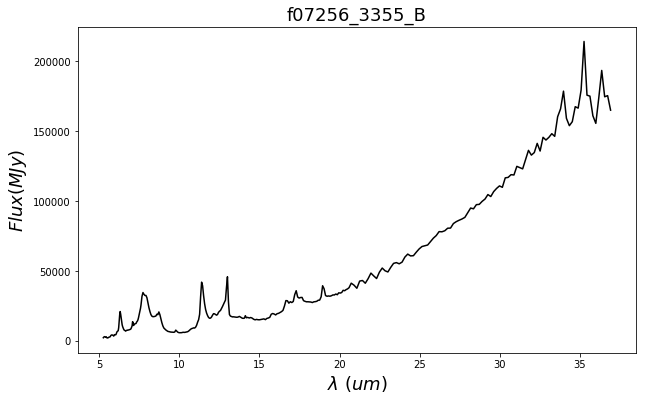

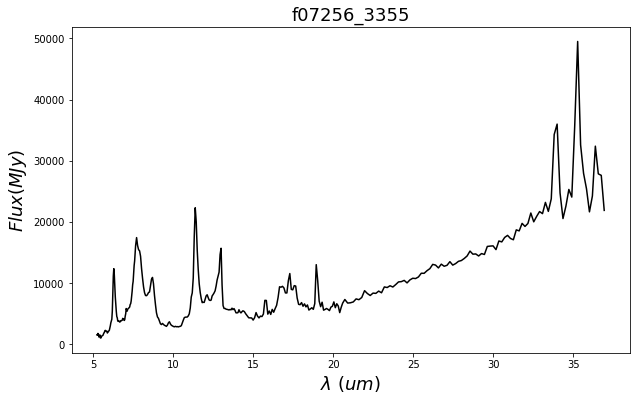

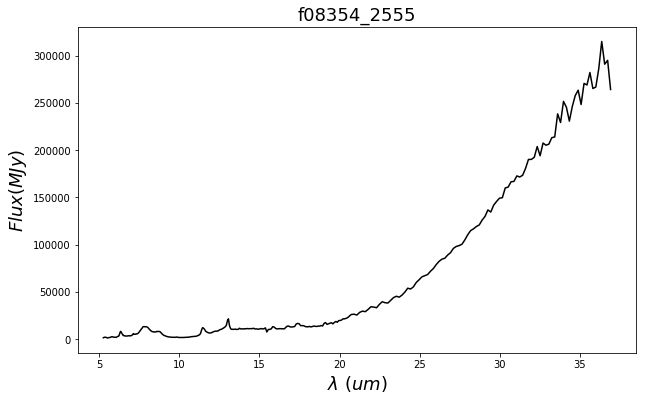

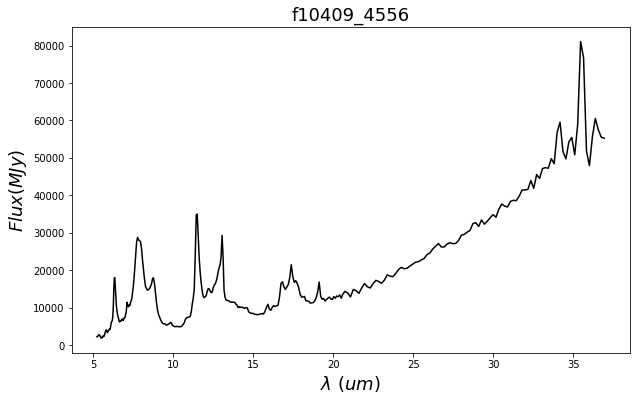

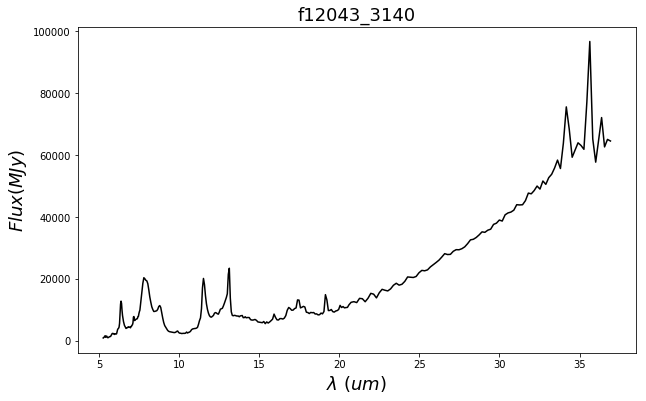

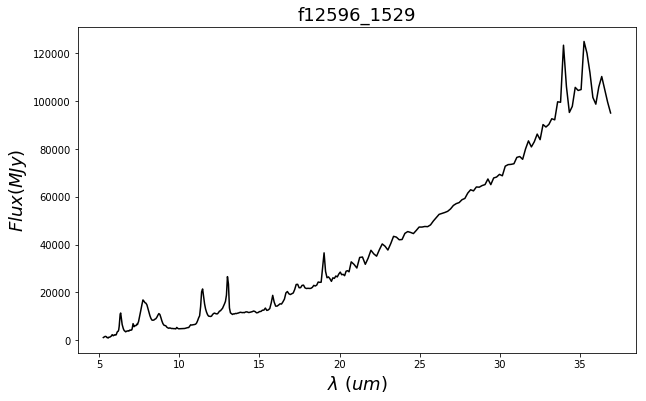

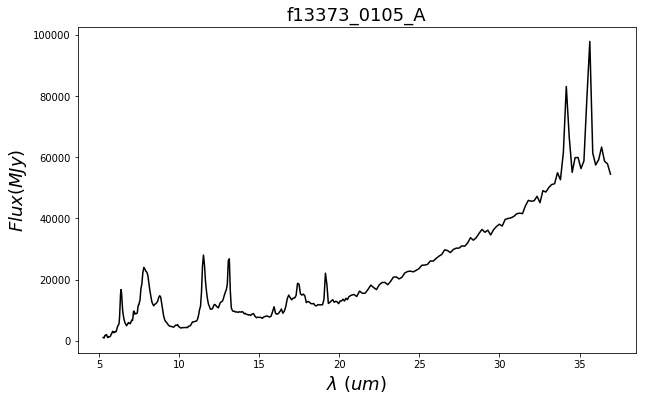

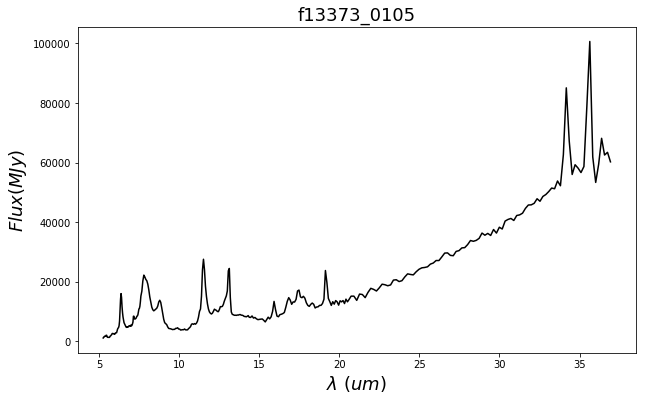

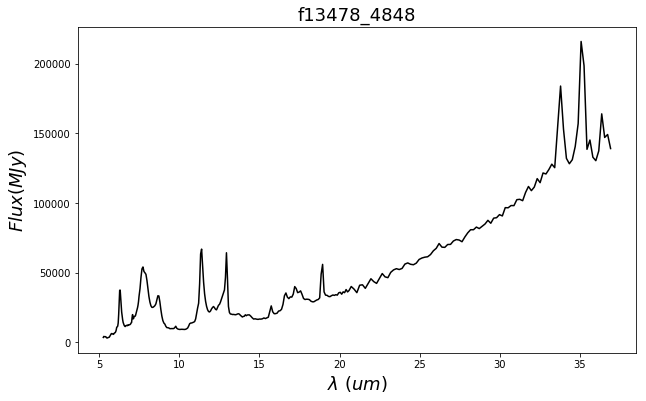

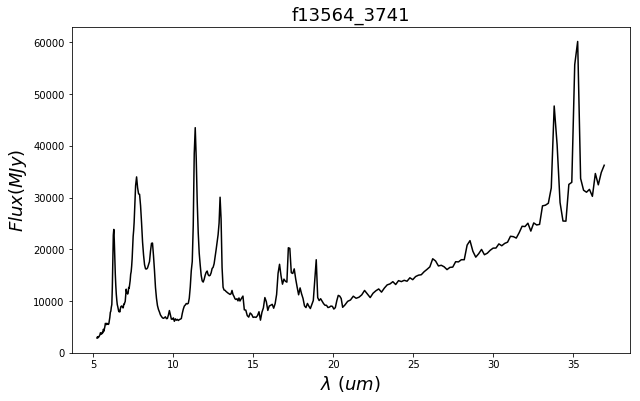

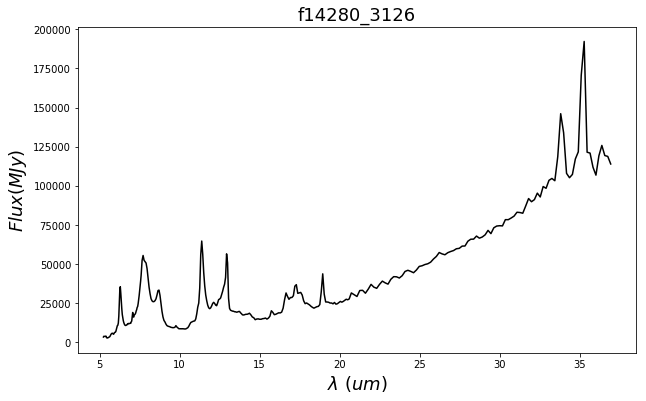

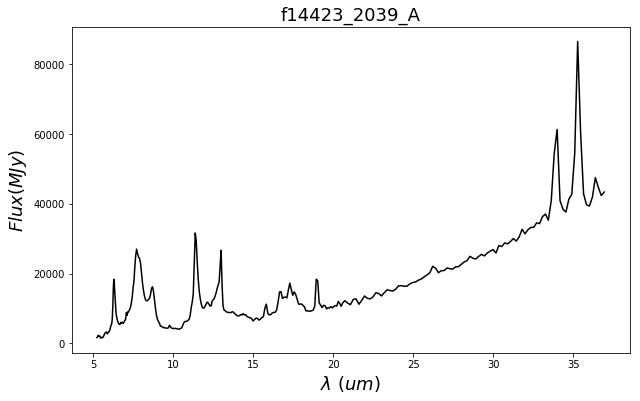

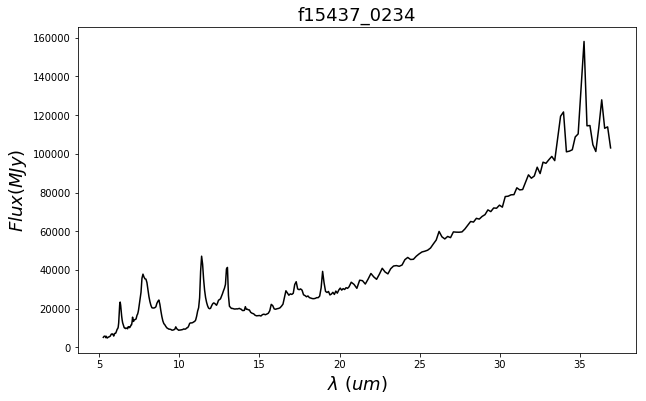

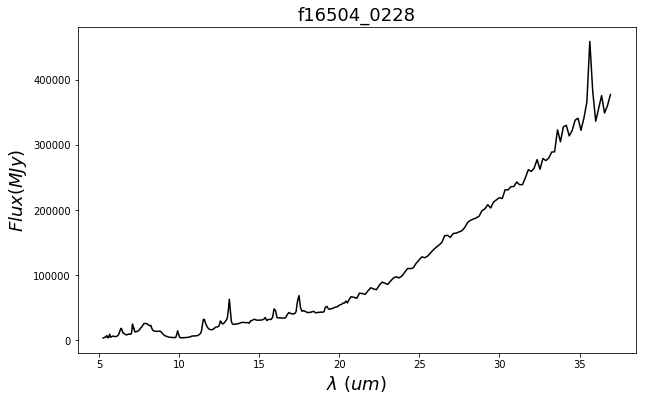

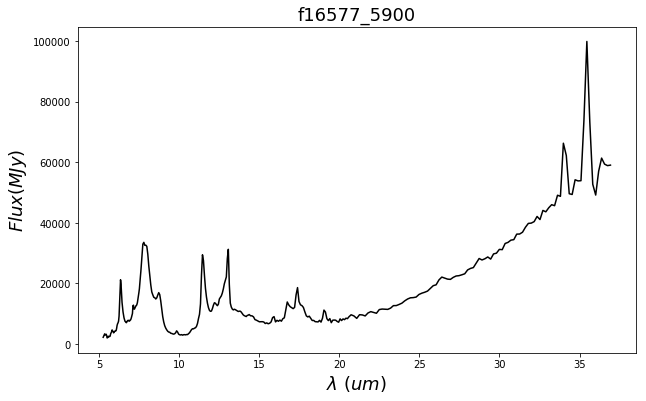

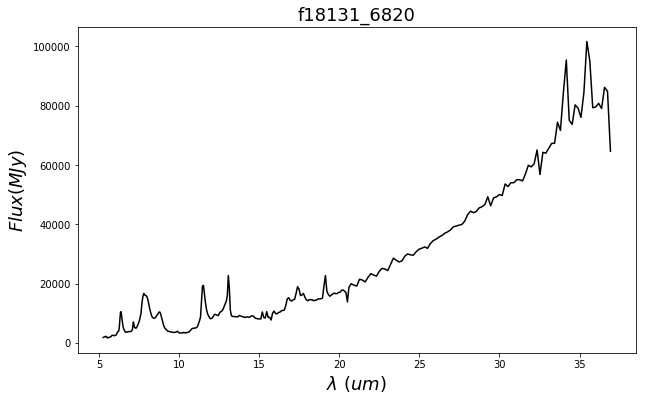

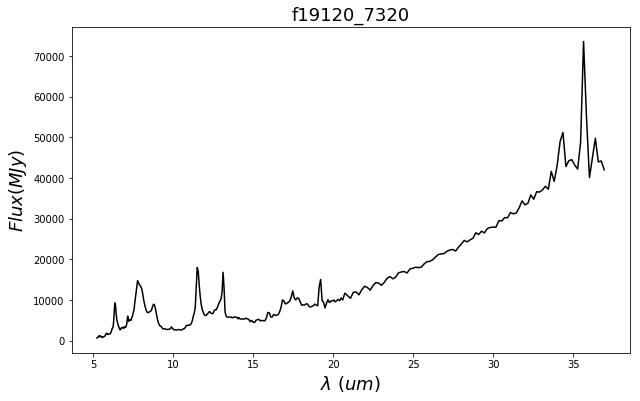

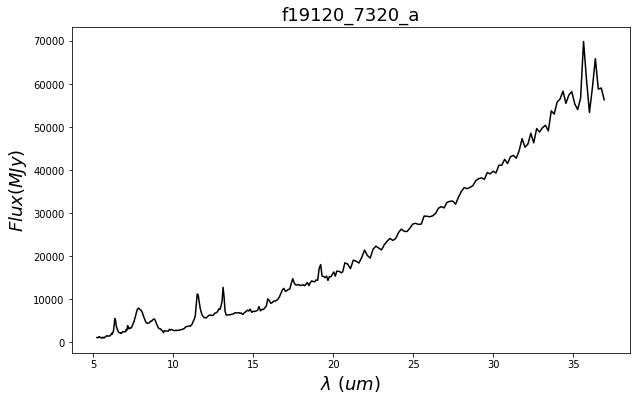

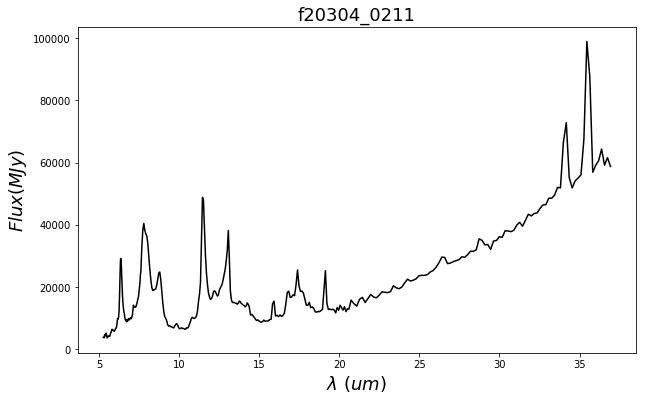

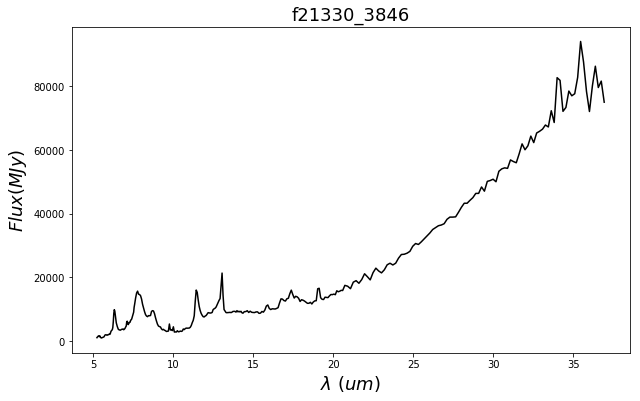

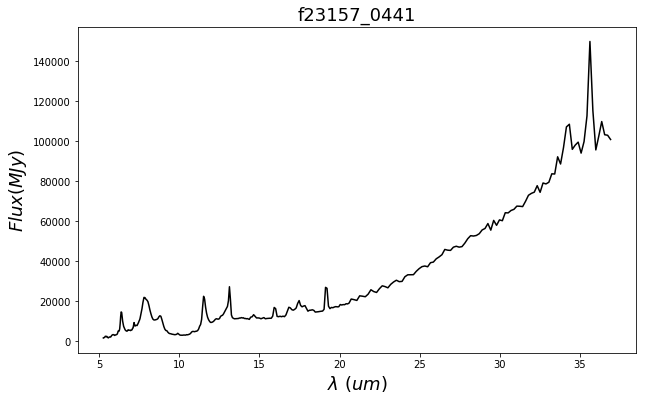

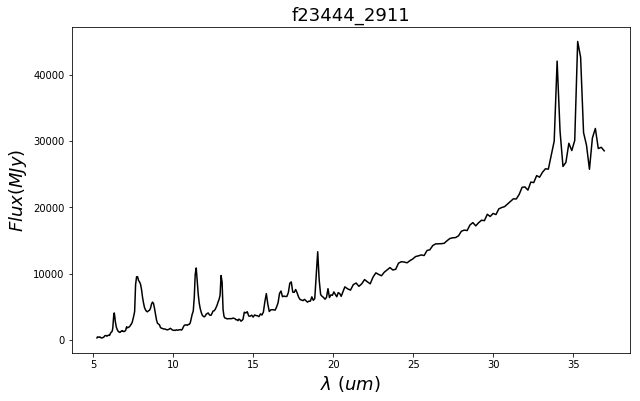

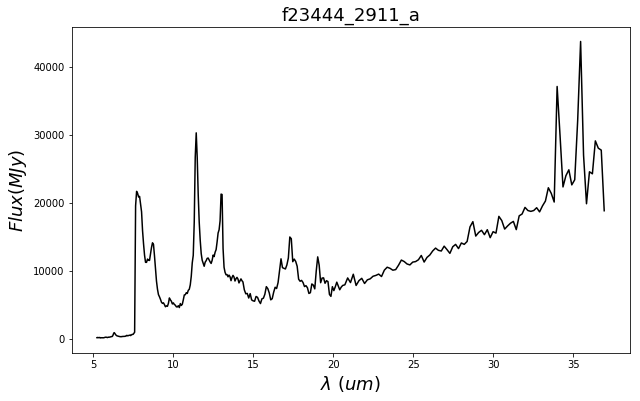

In [34]:
from astropy.table import Table
import matplotlib.pyplot as plt


cata = open('goals.txt')
gal_name = cata.readlines()
num = len(gal_name)
ii = num//4
for i in range(0,ii):
    name = gal_name[4*i].strip()
    nnnn = name.split('+')[0]
    plt.figure(figsize=[10,6])
    Spec = Table.read('Spectra/{}_sp.tbl'.format(nnnn[:-4]),format='ascii.ipac')
#    print(len(Spec_self['WAVELENGTH']),len(Spec_SINGS['WAVELENGTH']))
    plt.plot(Spec['wavelength'], Spec['flux'], 'k')
    plt.xlabel('$\lambda\ (um)$', fontsize=18)
    plt.ylabel('$Flux (MJy)$', fontsize=18)
    plt.title(nnnn[:-4], fontsize=18)
    plt.show()